# Индивидуальное задание

### Продискретизировать изображение, вывести его на экран.  Проквантовать изображение.


Загрузим и сохраним изображение, затем создадим его копию, над которой будет проводиться дискретизация.

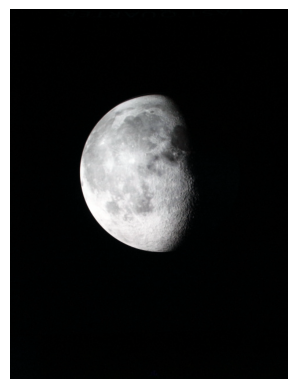

In [78]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('img/moon.jpg')
plt.imshow(image)
plt.axis("off");
img = image.copy()

Зададим размер шага изображения (количество пикселей в этом изображении будет K*K)

In [79]:
K = 10

 Получим размер исходного изображения и его тональность, а также запомним отдельно высоту и ширину исходного изображения

In [80]:
s = img.shape
h1, w1 = s[0], s[1]

Делим высоту на шаг с выделением остатка и вычитаем это из начальной высоты, повторяем для высоты.
Например: (641 - 641 % 10) = 641 - 1 = 640. Это позволяет за указанное кол-во шагов пройти все изображение точно без остатка

In [81]:
h = (s[0 - s[0] % K])
w = (s[1] - s[1] % K)

Пробегаем все изображение по высоте (сверху вниз) с шагом K. В цветном строка len вернет число 3 (так как у цветного параметра -  высота ширина и число каналов rgb), в полутоновом строка вернет число 2 (высота ширина). Функция np.average вычисляет средневзвешанное значение оси (здесь это -средний цвет изображения). Здесь img [y: (y + K), x: (x + K)] - вырезаем фрагмент изображения от текущего значения высоты y до K: (y:(y+K)), то же самое и для ширины x. Повторяем действие вычисления среднего значения цвета от предыдущего значения s (нужно для цветного изображения) и записываем это значение во весь блок изображения img[y:(y + K), x:(x + K)] (красим текущий блок изображения его средним значением).
Если же строка возвращает значение меньше 3 (2 − ширина и высота), значит это полутоновое изображение, находим среднее значение цвета блока и красим его в этот цвет (как в предыдущем шаге)

In [82]:
for y in range(0, h - 1, K):
    # Для каждого из пикселей - пробегаем все изображение по ширине (слева направо) с шагом K
    for x in range(0, w - 1, K):
        #
        if len(s) > 2:
            #
            s = np.average(img[y: (y + K), x: (x + K)], axis=0)
            img[y:(y + K), x:(x + K)] = np.average(s, axis=0)
            #
        #
        else:
            s = img[y:(y + K), x:(x + K)]
            img[y:(y + K), x:(x + K)] = np.average(s)

Возвращаем размер изображения к размеру исходного изображения. Объединим исходное и дискретизированное изображение в одно окно для сравнения и выведем это окно на экран.

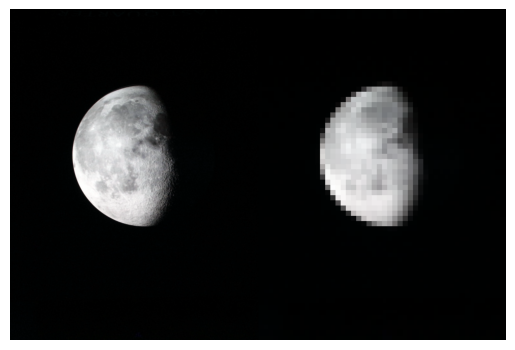

In [83]:
img = cv2.resize(img, (w1, h1))
res = np.hstack((image, img))
plt.imshow(res)
plt.axis("off");
# cv2.imshow("Discretization", res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Процесс квантования.

Изменяем размер массива изображения, где (–1,4) – задаем число строк и столбцов, в которые помещаем прежний массив. В данном случае 4 – означает в 4 столбца, а –1 это исключение, означает что мы даем python самому понять во сколько строк это можно уместить

In [84]:
Z = img.reshape(-1, 3)

Преобразуем массив к float (числа с плавающей точкой)

In [85]:
Z = np.float32(Z)

Критерии для остановки квантования. Здесь останавливаем квантование, если достигли 10 итераций или если достигли точности в 1.0)

In [86]:
crt = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

Функция квантования

In [87]:
ret, label, center = cv2.kmeans(Z, K, None, crt, 10, cv2.KMEANS_RANDOM_CENTERS)

Преобразование матрицы к формату uint8 (от 0 до 255), Сворачиваем массив нескольких матриц в одну, выводим изображение.

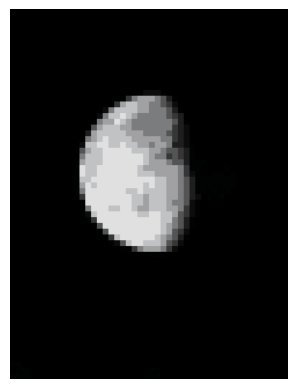

In [88]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape(img.shape)
plt.imshow(res2)
plt.axis("off");
# cv2.imshow("Quantization", res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()